# Customer Segmentation

It is a powerful analytics technique to group customers and enable the business to customize their product offering and marketing strategy. For example, we can group the customers by the month of the first purchase, segment by their recency, frequency and monetary values or run k-means clustering to identify similar groups of customers based on their purchasing behavior.

## cohort analysis

Cohort analysis is a descriptive analytics tool. It groups the customers into mutually exclusive cohorts - which are then measured over time. Cohort analysis provides deeper insights than the so-called vanity metrics. It helps with understanding the high level trends better by providing insights on metrics across both the product and the customer lifecycle

**There are tree major types of cohorts**: 
- Time cohorts are customers who signed up for a product or service during a particular time frame. Analyzing these cohorts shows the customers’ behavior depending on the time they started using the company’s products or services. The time may be monthly or quarterly, even daily. 
- Behavior cohorts are customers who purchased a product or subscribed to a service in the past. It groups customers by the type of product or service they signed up. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understanding the needs of the various cohorts can help a company design custom-made services or products for particular segments. 
- Size cohorts refer to the various sizes of customers who purchase company’s products or services. This categorization can be based on the amount of spending in some period of time after acquisition, or the product type that the customer spent most of their order amount in some period of time. 

**Element of Cohort Analysis**

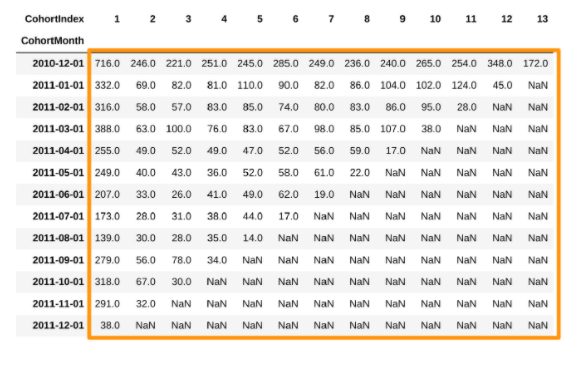

- The row values represent the cohort. In this case it's the month of the first purchase and customers are pooled into these groups based on their first ever purchase.
- The column values represent months since acquisition
- the metrics are in the table. Here, we have the count of active customers.

## 1. Time Cohort

For example, this number means that 24% of the cohort which signed up in August 2011, were active 4 months later. Column one here is the month of first purchase, therefore the retention rate is 100%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set()
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
online = pd.read_csv(r"C:\Users\HAXY8W\Desktop\DataCamp\Customer segmentation\part1 dt\online.csv", parse_dates=["InvoiceDate"])

In [3]:
online.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom


In [4]:
# Define a function that will parse the date
def get_day(x): return dt.datetime(x.year, x.month, 1) 

# Create InvoiceDay column
online['InvoiceMonth'] = online['InvoiceDate'].apply(get_day) 

# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('CustomerID')['InvoiceMonth'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortMonth'] = grouping.transform('min')

# View the top 5 rows
print(online.head())

   InvoiceNo StockCode                      Description  Quantity  \
0     572558     22745       POPPY'S PLAYHOUSE BEDROOM          6   
1     577485     23196    VINTAGE LEAF MAGNETIC NOTEPAD         1   
2     560034     23299     FOOD COVER WITH BEADS SET 2          6   
3     578307    72349B  SET/6 PURPLE BUTTERFLY T-LIGHTS         1   
4     554656     21756         BATH BUILDING BLOCK WORD         3   

          InvoiceDate  UnitPrice  CustomerID         Country InvoiceMonth  \
0 2011-10-25 08:26:00       2.10       14286  United Kingdom   2011-10-01   
1 2011-11-20 11:56:00       1.45       16360  United Kingdom   2011-11-01   
2 2011-07-14 13:35:00       3.75       13933  United Kingdom   2011-07-01   
3 2011-11-23 15:53:00       2.10       17290  United Kingdom   2011-11-01   
4 2011-05-25 13:36:00       5.95       17663  United Kingdom   2011-05-01   

  CohortMonth  
0  2011-04-01  
1  2011-09-01  
2  2011-07-01  
3  2011-11-01  
4  2011-02-01  


*Extract integer values from data* Before we can calculate the time offset, we will first create a helper function which will extract integer values of the year, month and day from a datetime() object.

In [5]:
def get_date_int(df,column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Now, we will calculate the number of months between any transaction and the first transaction for each customer

# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month, _ = get_date_int(online, "InvoiceMonth")

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(online, "CohortMonth")

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

## converting them to month

online["CohortIndex"] = years_diff * 12 + months_diff + 1
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-01,2011-04-01,7
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-01,2011-09-01,3
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-01,2011-07-01,1
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-01,2011-11-01,1
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-01,2011-02-01,4


The +1 is just to make sure the first month is marked as 1 instead of 0 for ease of interpretations

**Count monthly active customers from each cohort**

In [6]:
grouping = online.groupby(["CohortMonth","CohortIndex"])
cohort_data_cs = grouping["CustomerID"].apply(pd.Series.nunique)
cohort_data_cs = cohort_data_cs.reset_index()
cohort_counts = cohort_data_cs.pivot(index="CohortMonth",
                                 columns="CohortIndex",
                                 values="CustomerID")

cohort_counts.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN


**Customer retention rate**

In [7]:
## Store the first column as size (first month)
cohort_size = cohort_counts.iloc[:,0]

## divide all values by size column
retention = round(cohort_counts.divide(cohort_size,axis=0),3) 

retention.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.344,0.309,0.351,0.342,0.398,0.348,0.330,0.335,0.370,0.355,0.486,0.24
2011-01-01,1.0,0.208,0.247,0.244,0.331,0.271,0.247,0.259,0.313,0.307,0.373,0.136,NaN
2011-02-01,1.0,0.184,0.180,0.263,0.269,0.234,0.253,0.263,0.272,0.301,0.089,NaN,NaN
2011-03-01,1.0,0.162,0.258,0.196,0.214,0.173,0.253,0.219,0.276,0.098,NaN,NaN,NaN
2011-04-01,1.0,0.192,0.204,0.192,0.184,0.204,0.220,0.231,0.067,NaN,NaN,NaN,NaN


We can now compare the retention rate over time and across cohorts to evaluate the health of our customers' shopping habits

In [8]:
## Other metrics

# average quantity
grouping = online.groupby(["CohortMonth","CohortIndex"])
cohort_data = grouping["Quantity"].mean()
cohort_data = cohort_data.reset_index()
average_qt = cohort_data.pivot(index="CohortMonth",
                                 columns="CohortIndex",
                                 values="Quantity")

average_qt.round(1).head()


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,11.1,12.3,12.2,13.2,13.7,11.3,10.6,12.8,13.2,13.0,14.5,10.9,13.7
2011-01-01,10.9,10.8,10.0,10.1,14.3,13.2,17.4,16.4,18.7,10.2,10.7,13.2,NaN
2011-02-01,12.1,14.3,10.6,11.5,17.5,12.2,17.3,13.2,13.4,15.9,14.3,NaN,NaN
2011-03-01,9.6,14.2,13.0,10.2,16.1,12.7,11.6,11.5,9.0,9.6,NaN,NaN,NaN
2011-04-01,9.9,11.1,12.4,11.5,11.4,7.7,10.4,9.4,6.6,NaN,NaN,NaN,NaN


**Visualizing cohort analysis**

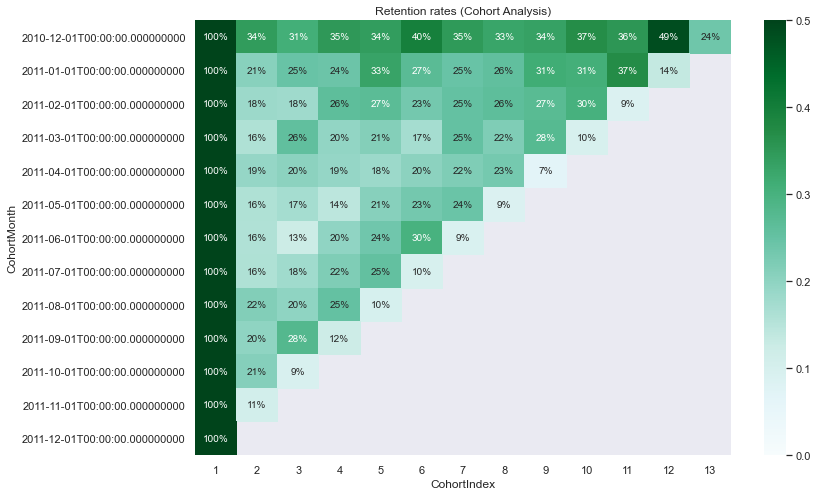

In [9]:

# Initialize an 8 by 6 inches plot figure
plt.figure(figsize=(12, 8))
plt.title('Retention rates (Cohort Analysis)')
sns.heatmap(data=retention, 
            annot=True, 
            cmap='BuGn',
           fmt=".0%",
           vmin=0.0,
           vmax=0.5)
plt.show()

# Recency, frequency, monetary (RFM) segmentation

*To do this, we are going to calculate three customer behavior metrics* 
- Recency: which measures how recent was each customer's last purchase, 
- Frequency: which measures how many purchases the customer has done in the last 12 months
- MonetaryValue - measures how much has the customer spent in the last 12 months.

Once we have calculated these numbers, the next step is to group them into some sort of categorization such as high, medium and low

**Recency** is just the number of days since the last transaction of the customer - the lower it is, the better, since every company wants its customers to be recent and active.

**Frequency** calculates the number of transactions in the last 12 months, although there are variations such as average monthly transactions which depict the essence of this metric as well

**Monetary value** is just the total value that the customer has spent with the company in the last 12 months

In [12]:
 online = pd.read_csv(r'C:\Users\HAXY8W\Desktop\DataCamp\Customer segmentation\part2 dt\online12M.csv',parse_dates=["InvoiceDate"])

In [13]:
## confirm that our data includes the recent 12 months of data.
print('min:{}; max:{}'.format(min(online.InvoiceDate),max(online.InvoiceDate)))

min:2010-12-10 00:00:00; max:2011-12-09 00:00:00


In [14]:
online['TotalSum'] = online['Quantity'] * online['UnitPrice']

In [15]:
##  In the real world, we would be working with the most recent snapshot of the data of today or yesterday, 
## but in this case the data comes from 2010 and 2011, so we have to create a hypothetical snapshot date 
## that we'll use as a starting point to calculate metrics as if we're doing the analysis on the most recent data

snapshot_date = max(online.InvoiceDate) + dt.timedelta(days=1)

# Calculate Recency, Frequency and Monetary value for each customer 
datamart = online.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days, ## this will give us number of days between hypothetical today and last transactions
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})


# Rename the columns 
datamart.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

# Print top 5 rows
print(datamart.head())

            Recency  Frequency  MonetaryValue
CustomerID                                   
12747             3         25         948.70
12748             1        888        7046.16
12749             4         37         813.45
12820             4         17         268.02
12822            71          9         146.15


**Building RFM Segment**: group customers into 4 segments of same size for each RFM value.

We have previously created a dataset containing Recency, Frequency and Monetary Value metrics for each customer. Now our next step will be to use them to assign quartiles of these metrics for each customer

In [16]:
## Calculate recency quartile (q=4) high quartile is better as it is more recent

# Store labels from 4 to 1 in a decreasing order
r_labels = list(range(4, 0, -1))

# Create a spend quartile with 4 groups and pass the previously created labels from the datamart df 
r_quartiles = pd.qcut(datamart['Recency'], q=4, labels=r_labels).astype('object')

# Assign the quartile values to the Recency_Quartile column in `data`
datamart['R'] = r_quartiles 



## Calculate frquency and montory quartile (q=4) high quartile is better as it is more recent

# Store labels from 1 to 5 
f_labels = list(range(1,5))
m_labels = list(range(1,5))

# Create a spend quartile with 4 groups and pass the previously created labels from the datamart df 
f_quartiles = pd.qcut(datamart['Frequency'], q=4, labels=f_labels).astype('object')
m_quartiles = pd.qcut(datamart['MonetaryValue'], q=4, labels=m_labels).astype('object')

# Assign the quartile values to the Recency_Quartile column in `data`
datamart['F'] = f_quartiles 
datamart['M'] = m_quartiles 

# Print `data` with sorted Recency_Days values
datamart.head(10).sort_values('R')

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12823,297,1,306.00,1,1,3
12822,71,9,146.15,2,2,3
12824,60,6,106.38,2,2,2
12827,33,2,44.55,3,1,1
12747,3,25,948.70,4,4,4
12748,1,888,7046.16,4,4,4
12749,4,37,813.45,4,4,4
12820,4,17,268.02,4,3,3
12826,3,16,272.66,4,3,3


In [17]:
## create the RFM Segment which is just a concatenated string of RFM values

def join_rfm(x): return str(x['R'])+ str(x['F'])+ str(x['M'])

datamart['RFM_segment'] = datamart.apply(join_rfm, axis=1)

# Calculate RFM_Score
datamart['RFM_Score'] = datamart[['R','F','M']].sum(axis=1)

datamart.head(10)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_Score
CustomerID,,,,,,,,
12747,3,25,948.70,4,4,4,444,12.0
12748,1,888,7046.16,4,4,4,444,12.0
12749,4,37,813.45,4,4,4,444,12.0
12820,4,17,268.02,4,3,3,433,10.0
12822,71,9,146.15,2,2,3,223,7.0
12823,297,1,306.00,1,1,3,113,5.0
12824,60,6,106.38,2,2,2,222,6.0
12826,3,16,272.66,4,3,3,433,10.0
12827,33,2,44.55,3,1,1,311,5.0


In [18]:
## get the largest 10 RFM segment to look at it

datamart.groupby("RFM_segment").size().sort_values(ascending=False)[:10]

RFM_segment
444    372
111    345
211    169
344    156
233    129
222    128
333    120
122    117
311    114
433    113
dtype: int64

In [19]:
## Summary metrics per RFM score

# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = datamart.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
     # Return the size of each segment
    'MonetaryValue': ['mean', 'count']
}).round(1)

# Print the aggregated dataset
print(rfm_level_agg.head(10))

          Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3.0         246.9       2.1          28.4   345
4.0         162.2       3.1          47.8   337
5.0         138.9       4.3          78.2   393
6.0         101.0       6.3         146.3   444
7.0          78.0       8.5         160.2   382
8.0          62.6      12.8         196.3   376
9.0          46.8      16.7         330.3   345
10.0         31.9      24.0         443.1   355
11.0         21.8      38.9         705.3   294
12.0          8.0      75.6        1653.9   372


In [20]:
## Although intuitive, it is still hard to fully interpret this segmentation. 
# Often, we'd like to group customers based on their RFM scores into an even smaller number of segments

# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Gold'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9)):
        return 'Silver'
    else:
        return 'Bronze'

# Create a new variable RFM_Level
datamart['General_Segment'] = datamart.apply(rfm_level, axis=1)

datamart.groupby('General_Segment').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            205.0       2.6          38.0   682
Gold               27.0      39.4         800.8  1366
Silver             95.8       7.9         144.6  1595

### Using Machine learning to cluster customers instead of manual process as before

**K-Means Clustering**

*Assumptions*:
- all variables have symmetrical distributions. this means the distribution is not skewed (Skewness is best managed by applying a logarithmic transformation to each of the skewed variables - positive values only, other alternatives for negative values like: Adding constant values to all observation to force all to be positive, or calculate cube root)
- all variables have the same average values. This is key to ensuring that each metric gets an equal weight in the k-means calculation
- we will have to scale the variance of each variable to the same levels

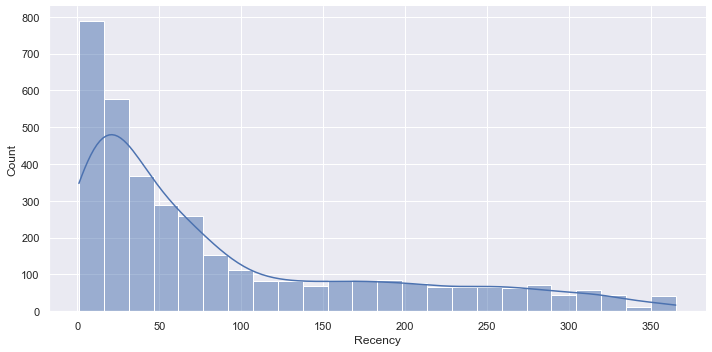

In [21]:
## Identify Skewness

sns.displot(data=datamart, x="Recency", kde=True, height=5,aspect=2)
#sns.histplot(datamart['Recency'], kde=True)
plt.show()

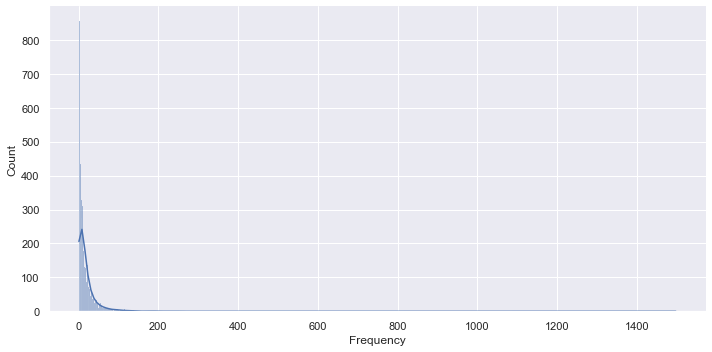

In [22]:
## Identify Skewness

sns.displot(data=datamart, x="Frequency", kde=True, height=5,aspect=2)
#sns.histplot(datamart['Recency'], kde=True)
plt.show()

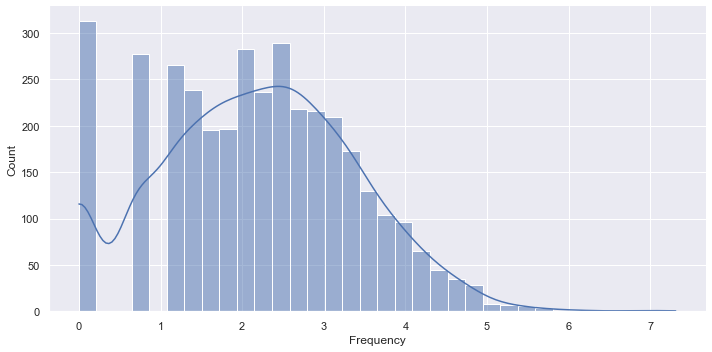

In [23]:
## Removing skewnness by log function

freq_log = np.log(datamart['Frequency'])

## Identify Skewness after log 
sns.displot(data=datamart, x=freq_log, kde=True, height=5,aspect=2)
#sns.histplot(datamart['Recency'], kde=True)
plt.show()

In [24]:
## Identify scaling and variances

datamart[["Recency","Frequency","MonetaryValue"]].describe()

,Recency,Frequency,MonetaryValue
count,3643.00000,3643.000000,3643.000000
mean,90.43563,18.714247,370.694387
std,94.44651,43.754468,1347.443451
min,1.00000,1.000000,0.650000
25%,19.00000,4.000000,58.705000
50%,51.00000,9.000000,136.370000
75%,139.00000,21.000000,334.350000
max,365.00000,1497.000000,48060.350000


They have different mean and different standard deviations. K-means works better on variables with not only the same average values, but with the same variance.
#### 1. Manual

In [25]:
data_rfm = datamart[["Recency","Frequency","MonetaryValue"]]

datamart_centered = data_rfm - data_rfm.mean()
datamart_centered.describe().round(2)

,Recency,Frequency,MonetaryValue
count,3643.00,3643.00,3643.00
mean,-0.00,-0.00,0.00
std,94.45,43.75,1347.44
min,-89.44,-17.71,-370.04
25%,-71.44,-14.71,-311.99
50%,-39.44,-9.71,-234.32
75%,48.56,2.29,-36.34
max,274.56,1478.29,47689.66


In [26]:
datamart_scaled = data_rfm / data_rfm.std()
datamart_scaled.describe().round(2)

,Recency,Frequency,MonetaryValue
count,3643.00,3643.00,3643.00
mean,0.96,0.43,0.28
std,1.00,1.00,1.00
min,0.01,0.02,0.00
25%,0.20,0.09,0.04
50%,0.54,0.21,0.10
75%,1.47,0.48,0.25
max,3.86,34.21,35.67


#### 2. Automatic through Sklearn

In [27]:
from sklearn.preprocessing import StandardScaler

# initiate the object
scaler = StandardScaler()

scaler.fit(data_rfm)
data_norm = scaler.transform(data_rfm)

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_norm, index=data_rfm.index, columns=data_rfm.columns)

# Print summary statistics
data_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,3643.00,3643.00,3643.00
mean,-0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-0.95,-0.40,-0.27
25%,-0.76,-0.34,-0.23
50%,-0.42,-0.22,-0.17
75%,0.51,0.05,-0.03
max,2.91,33.79,35.40


the results is the same whether manual or automatic, so it is up to you, however Sklearn makes it easy to do such scalling so why not. 

**The Sequence of processing the data is very important**:
1. Unskew the data - log transformation
2. Standarize to same average value
3. Scale to same std
4. Store the transformed data as different object to be used for clustering

# Implementing K-Mean machine learning

In [28]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(data_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Create a DataFrame by adding a new cluster label column
data_rfm_k3 = data_rfm.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = data_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         231.9       6.0         106.4   951
1          40.6      21.2         380.4  2677
2          22.8     380.8       15403.0    15

**How to choose number of clusters**
- Visual (Elbow criterion): elbow criterion method plots the sum of squared errors for each number of segments. The sum of squared errors is basically the sum of squared distances from each data point to their cluster center(centriod). We then look at the chart to identify where the decrease in SSE slows down and becomes somewhat marginal.
- Mathematical methods - silhoutte coefficients
- Experiementation and interpretations

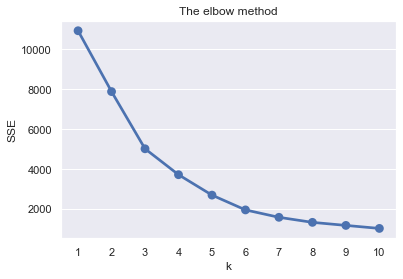

In [29]:
## implementing the elbow criterion

sse={}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_ # here is the sum of squared distance to closest cluster center

# plot the results
plt.title("The elbow method")
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y = list(sse.values()))
plt.show()

*The idea is to try to find the point with the largest angle which is the so-called elbow. this should be discussed in business context to make sure the results make sense - here 4 could be sensible*

## Profile and interpret segments

- assign the cluster label to the original dataset and then calculate average values of each cluster
- use snake plots - a chart that visualizes RFM values between the segments
- calculate the relative importance of each cluster's attributes compared to the population average

In [30]:
## Just repetition from previous calculation in order to compare it to 2 clusters


# Group the data by cluster
grouped = data_rfm_k3.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         231.9       6.0         106.4   951
1          40.6      21.2         380.4  2677
2          22.8     380.8       15403.0    15

In [31]:
data_rfm2 = data_rfm.copy()

# Initialize KMeans
kmeans = KMeans(n_clusters=4, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(data_normalized)

# Extract cluster labels
cluster_labels_ = kmeans.labels_

# Create a DataFrame by adding a new cluster label column
data_rfm_k4 = data_rfm2.assign(Cluster=cluster_labels_)

# Group the data by cluster
grouped2 = data_rfm_k4.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped2.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          40.8      21.3         364.6  2678
1         232.4       6.0         106.3   946
2           2.7    1146.7        9293.9     3
3          23.8     120.6       15352.5    16

*clearly the 4 clusters gives more insight into customer behaviuor*

**Using Sneak Plot**

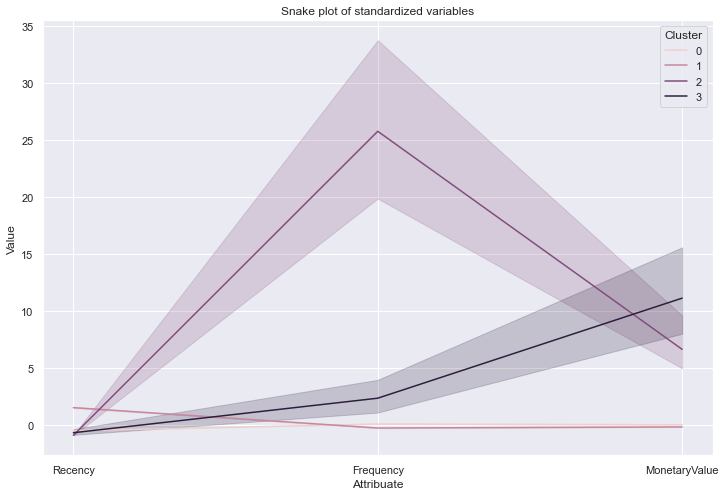

In [34]:
# SneakPlot market research visualization technique plotting segments and their RFM values on a line chart
## We need to normalize the data
# 1- create a DataFrame from our normalized NumPy array
# 2- assign a cluster label from the datamart_rfm_k3 dataset
# 3- melt the three RFM columns and create one called attribute


datamart_normalized = pd.DataFrame(data_normalized,
                                  index=data_rfm.index,
                                  columns=data_rfm.columns)

datamart_normalized['Cluster'] = data_rfm_k4['Cluster']


datamart_melt = pd.melt(datamart_normalized.reset_index(),
                       id_vars=['CustomerID','Cluster'],
                       value_vars=['Recency','Frequency','MonetaryValue'],
                       var_name='Attribuate',
                       value_name='Value')

# Add the plot title
plt.title('Snake plot of standardized variables')

# Add the x axis label
plt.xlabel('Attribuate')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
g = sns.lineplot(data=datamart_melt, x='Attribuate', y='Value', hue='Cluster')
sns.set(rc={'figure.figsize':(12,8)})
plt.show()

The graph is distorted due to cluster 2 and 3 MonetaryValue's mean 15352and 9293 vs others which is 364 and 106.

**Relative importance of segment attributes**
In general, we want our segments to differ from the overall population, and have distinctive properties of their own. We can use this technique to identify relative importance of each attribute.

we calculate the average RFM values for each cluster. Then, we do the same for the total population. Finally, we divide the two, and subtract 1 from the result.The further that ratio is from zero, the more important that attribute is for defining a specific cluster compared to the population average

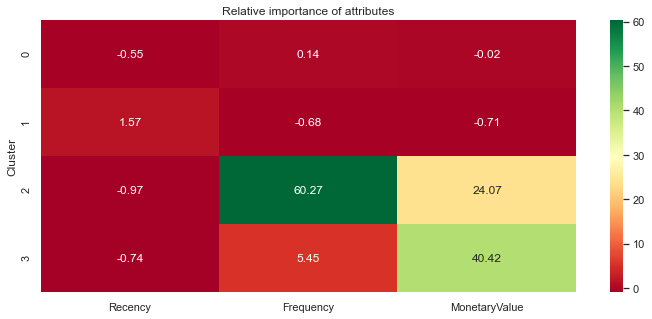

In [35]:
# Calculate average RFM values for each cluster
cluster_avg = data_rfm_k4.groupby(['Cluster']).mean() 

# Calculate average RFM values for the total customer population
population_avg = data_rfm.mean()

# Calculate relative importance of cluster's attribute value compared to population
relative_imp = cluster_avg / population_avg - 1


# Initialize a plot with a figure size of 8 by 2 inches 
plt.figure(figsize=(12, 5))

# Add the plot title
plt.title('Relative importance of attributes')

# Plot the heatmap
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

In [36]:
## to just get the numbers
relative_imp.round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,-0.55,0.14,-0.02
1,1.57,-0.68,-0.71
2,-0.97,60.27,24.07
3,-0.74,5.45,40.42
